## 순환 신경망(Recurrent Neural Network)

- 피드 포워드 신경망은 입력의 길이가 고정되어 있어 자연어 처리를 위한 신경망으로는 한계가 있어, 다양한 길이의 입력 시퀀스를 처리할 수 있는 인공 신경망이 필요하게 됨::: RNN
    - 기본 : 바닐라RNN
    - 이를 개선한 LSTM, GRU
    
- 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델
    - *시퀀스모델: 시퀀스를 처리하기 위해 고안된 모델 
    <br> 예) 번역기의 경우: 입력은 번역하고자 하는 단어의 시퀀스인 문장, 출력에 해당되는 번역된 문장 또한 단어의 시퀀스
  
- 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보냄
    <br> vs 피드 포워드 신경망(Feed Forward Neural Network): 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향하는 신경망

## 8-1. 순환 신경망 (바닐라RNN)

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image

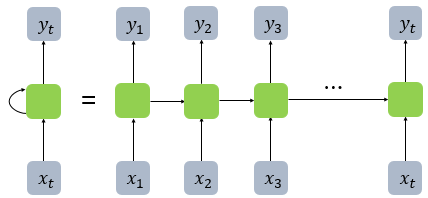

In [2]:
Image('Data/230628/1.png')

↑ 각 네모는 벡터 단위

좌측 우측 모두 RNN을 표현

- 셀(cell): RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
    <br> = 메모리셀 또는 RNN셀 (이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행)
    - 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 함
    - 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받음
- 은닉상태(hidden state): 메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값

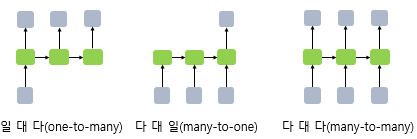

In [5]:
Image('Data/230628/2.png', width = 500)

입력과 출력의 길이를 다르게 설계 가능

① One-to-many 모델 
    ex) 이미지 캡셔닝(하나의 이미지 입력에 대해 사진의 제목(시퀀스)을 출력)
    
② Many-to-one 모델  ex) 감성분류(긍정/부정 분류), 스팸메일분류     
    
③ many-to-many 모델 ex) 챗봇(사용자가 문장을 입력하면 대답 문장을 출력), 입력 문장으로부터 번역된 문장을 출력하는 번역기, 개체명 인식이나 품사 태깅 등

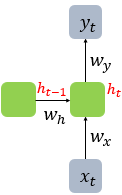

In [9]:
Image('Data/230628/3.png', width = 150)

은닉층: $h_t = tanh(W_xx_t + W_hh_{t-1} + b) $

출력층: $y_t = f(W_yh_t + b) $  $f$는 비선형 활성화함수

<은닉층>

$h_t$: 현재시점 t에서의 은닉상태값

$h_t$를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용됨

$W_x$: 입력층을 위한 가중치 

$W_h$: $h_{t-1}$를 위한 가중치    ($h_{t-1}$: 이전시점 t-1에서의 은닉상태값) 

각각의 가중치 $W_x, W_h, W_y$의 값은 하나의 층에서는 모든 시점에서 값을 동일하게 공유, 다른 층에서의 가중치는 다름

<출력층>

활성화 함수는 푸는 문제에 따라 다름
- 이진분류: 로지스틱 회귀, sigmoid함수 사용
- 다중클래스분류: softmax회귀, softmax함수 사용

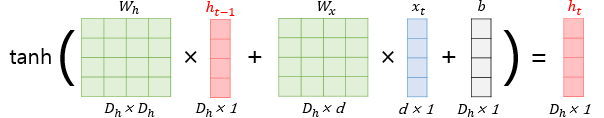

In [12]:
# 배치크기 1, d와 D_H 값을 4로 가정 시 RNN 은닉층연산

Image('Data/230628/4.png', width = 600)

### Keras로 RNN 구현

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

# 추가 인자를 사용할 때 (하나의 RNN층에 대한 코드)
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))

# 추가 인자를 사용할 때(다른 표기)
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))

- hidden_units = 은닉 상태의 크기. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가짐

- timesteps = 입력 시퀀스의 길이(input_length). 시점의 수
- input_dim = 입력의 크기 (단어의 차원수)

### ★텐서 Tensor -----------------------------------------------------------------------------------------------

- 텐서의 차원: 축의 개수
- 텐서의 크기: 각 축을 따라서 얼마나 많은 차원이 있는지를 나타낸 값

#### 1) 0차원 텐서: Scalar
- 하나의 실수값으로 이루어진 데이터
- 0D 텐서

In [15]:
import numpy as np
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


#### 2) 1차원 텐서: Vector
- 숫자를 배열한 것
- 벡터의 차원과 텐서의 차원은 다름. 
    - 벡터의 차원은 하나의 축에 놓인 원소의 개수 vs 텐서의 차원은 축의 개수
    - 아래의 예제는 4차원 벡터이지만, 1차원 텐서 1D텐서

In [16]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


#### 3) 2차원 텐서: Matrix 
- 행렬, 행과 열이 존재하는 벡터의 배열
- 2D 텐서

In [17]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


#### 4) 3차원 텐서: 다차원 배열
- 3차원 이상의 텐서부터 본격적으로 텐서라고 부름
- 시퀀스 데이터(sequence data)를 표현할 때 자주 사용됨
    - 시퀀스 데이터는 주로 단어의 시퀀스를 의미, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트가 될 수 있음
- 3D텐서:  (samples, timesteps, word_dim) 또는 (batch_size, timesteps, word_dim)
    - samples: 샘플의 개수
    - timesteps: 시퀀스의 길이
    - word_dim: 단어를 표현하는 벡터의 차원
    - batch_size: 일괄로 처리하기 위해 데이터를 묶는 단위

In [98]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]])
a.shape, a

((3, 5),
 array([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [10, 11, 12, 13, 14]]))

In [18]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


예제) 

문서1 : I like NLP

문서2 : I like DL

문서3 : DL is AI

In [41]:
st1 = 'I like NLP'
st2 = 'I like DL'
st3 = 'DL is AI'
st1 = [i for i in st1.split(' ')]
st2 = [i for i in st2.split(' ')]
st3 = [i for i in st3.split(' ')]
result = st1 + st2 + st3
result

['I', 'like', 'NLP', 'I', 'like', 'DL', 'DL', 'is', 'AI']

In [42]:
dics = {}
for word in result:
    if word not in dics.keys():   # key: value로 저장되므로 중복 없음
        dics[word] = len(dics)

# 원핫 인코딩
nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]

print(dics)
print()
print(one_hot_targets)

{'I': 0, 'like': 1, 'NLP': 2, 'DL': 3, 'is': 4, 'AI': 5}

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


훈련 데이터의 단어들을 모두 원-핫 벡터로 바꿔서 인공 신경망의 입력으로 한꺼번에 사용

이렇게 훈련 데이터를 다수 묶어 입력으로 사용하는 것을 딥 러닝에서는 배치(Batch)라고 함

[[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]],  
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]],  
[[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]] 

위는 (3,3,6)의 크기를 가지는 3D텐서

#### 5) 그 이상의 텐서

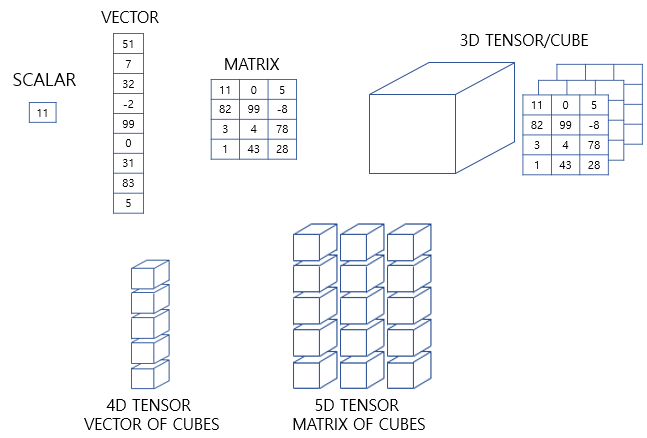

In [45]:
Image('Data/230628/6.png', width = 500)

#### 6) 케라스에서의 텐서

- 3차원 텐서의 크기(shape)는 (2, 3, 5)
- 케라스에서는 신경망의 층에 입력의 크기(shape)를 인자로 줄 때 input_shape라는 인자를 사용
    - input_shape의 두 개의 인자는 (input_length, input_dim)
        - input_shape는 배치 크기를 제외하고 차원을 지정
        - 입력의 속성 수를 의미하는 input_dim
        - 시퀀스 데이터의 길이를 의미하는 input_length 
    - 예) input_shape(6, 5)라는 인자값을 사용한다면 이 텐서의 크기는 (?, 6, 5)을 의미
        - 만약 배치 크기까지 지정해주고 싶다면 batch_input_shape=(8, 2, 10): 텐서의 크기 (8, 2, 10)
        
### -------------------------------------------------------------------------------------------------------------------

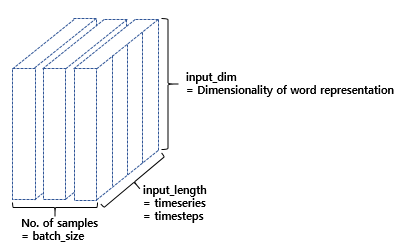

In [46]:
Image('Data/230628/5.png', width = 500)

RNN층은 (batch_size, timesteps, input_dim) 크기의 3D 텐서를 입력으로 받음
- batch_size - 한번에 학습하는 데이터 개수
- timesteps = 입력 시퀀스의 길이(input_length). 시점의 수 (?)
- input_dim = 입력의 크기 (단어의 차원수), 속성 수

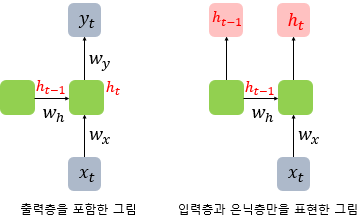

In [50]:
Image('Data/230628/7.png', width = 400)

RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냄
- 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴
- 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴
- 이는 RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정 가능
    - output_dim은 앞서 코드에서 정의한 hidden_units의 값으로 설정

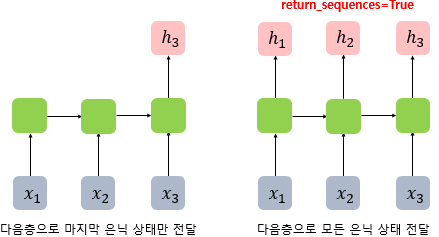

In [52]:
Image('Data/230628/8.png', width = 450)

위의 그림은 time step=3일 때, return_sequences = True를 설정했을 때와 그렇지 않았을 때 어떤 차이가 있는지를 보여줌

- 마지막 은닉 상태만 전달하도록 하면(return_sequences=False 또는 디폴트): 다 대 일(many-to-one) 문제를 풀 수 있고, 

- 모든 시점의 은닉 상태를 전달하도록 하면(return_sequences=True): 다음층에 RNN 은닉층이 하나 더 있는 경우이거나 다 대 다(many-to-many) 문제를 풀 수 있음

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_units의 값인 3임.

이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 됨

Param # 

    = number_units * (number_units + input_dim + 1)
    = 파라미터 아웃값 * ( 파라미터 아웃값 + 인풋 디멘션값 + Bias)
    
Total params = recurrent_weights + input_weights + biases

    = (num_units*num_units)+(num_features*num_units) + (1*num_units)
    = (num_features + num_units)* num_units + num_units
    = ( unit 개수 * unit 개수 ) + ( input_dim(feature) 수 + unit 개수 ) + ( 1 * unit 개수)



↓ batch_size를 8로 기재하면 출력의 크기가 (8, 3)이 됨

In [54]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


↓ return_sequences 매개 변수에 True를 기재하여 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴

출력 크기가 (8,2,3)이 됨

In [55]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 파이썬으로 RNN 구현하기 

$$ h_t = tanh(W_xX_t + W_hh_{t-1} + b) $$

In [ ]:
# 아래의 코드는 가상의 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화

for input_t in input_length: # 각 시점마다 입력을 받음
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 됨
    

- hidden_state_t: t 시점의 은닉 상태

- input_length: 입력 데이터의 길이
    입력 데이터의 길이는 곧 총 시점의 수(timesteps, 자연어 처리에서는 보통 문장의 길이)
    
- input_t: t시점의 입력값

- 각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산

초기 은닉 상태는 0의 값을 가지는 벡터로 초기화

- input_dim: 입력의 차원 (자연어 처리에서는 보통 단어 벡터의 차원)

- hidden_units: 은닉 상태의 크기, 메모리 셀의 용량

In [85]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [86]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [87]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.61517448 0.61412363 0.86152442 0.90640642 0.52334237 0.95588002
  0.70394705 0.93504861]
 [0.99902627 0.99942042 0.99918617 0.99925362 0.99986409 0.99986398
  0.99990691 0.99977373]
 [0.99992316 0.99996204 0.99992204 0.99997317 0.99999125 0.99999748
  0.99999564 0.99999601]
 [0.99986669 0.99994071 0.99978073 0.99995647 0.9999931  0.99999286
  0.99998997 0.99998025]
 [0.99983309 0.99991736 0.99985332 0.99997379 0.99999322 0.99999536
  0.99999657 0.99998743]
 [0.9998136  0.99991674 0.99974042 0.99992368 0.99999303 0.99998506
  0.99998722 0.99995685]
 [0.99994282 0.99996427 0.99994852 0.99997581 0.99999345 0.99999755
  0.99999721 0.99999481]
 [0.9997183  0.99987484 0.99971801 0.99993889 0.99999307 0.9999854
  0.99999216 0.99995499]
 [0.99973458 0.99990162 0.9997345  0.99978674 0.99998823 0.99996782
  0.99997408 0.99995379]
 [0.99984482 0.99992787 0.99986472 0.99994436 0.99999131 0.99999223
  0.99999337 0.9999855 ]]


### 깊은 순환 신경망(Deep Recurrent Neural Network)

- 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망이 될 수 있음

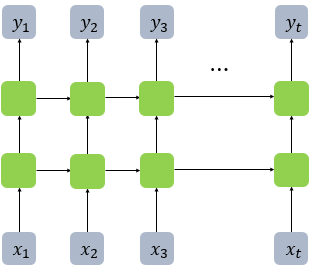

In [89]:
Image('Data/230628/16.png', width = 300)

### 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

-  시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여할 수 있다는 아이디어의 기반함

- RNN이 풀고자 하는 문제 중에서는 과거 시점의 입력 뿐만 아니라 미래 시점의 입력에 힌트가 있는 경우도 많으므로, 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 할 수 있도록 고안된 것이 양방향 RNN임

- 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용
    - 첫번째 메모리 셀은 앞 시점의 은닉 상태(Forward States) 를 전달받아 현재의 은닉 상태를 계산. 그림에서 주황섹 메모리 셀
    - 두번째 메모리 셀은 앞에서 배운 것과는 다름. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States) 를 전달 받아 현재의 은닉 상태를 계산함. 입력 시퀀스를 반대 방향으로 읽는 것임. 그림에서는 초록색 메모리 셀
    
    - 위 두 개의 값 모두가 현재 시점의 출력층에서 출력값을 예측하기 위해 사용됨

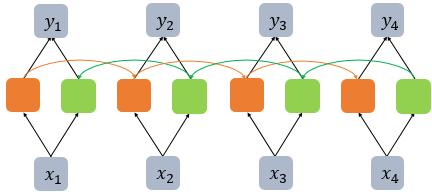

In [91]:
Image('Data/230628/17.png', width = 500)

In [92]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

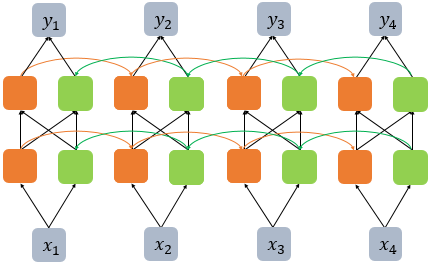

In [94]:
Image('Data/230628/18.png', width = 500)

↑ 은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습
    
은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아님

은닉층을 추가하면 학습할 수 있는 양이 많아지지만 반대로 훈련 데이터 또한 많은 양이 필요

## 8-2. 장단기메모리 LSTM Long Short-Term Memory

- 바닐라 RNN(Vanilla RNN) 이후 바닐라 RNN의 한계를 극복하기 위한 변형 등장

### 바닐라RNN

- 출력 결과가 이전의 계산 결과에 의존
- 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보임
- 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생: 장기 의존성 문제(the problem of Long-Term Dependencies)

$$ h_t = tanh(W_xx_t + W_hh_{t-1} + b $$

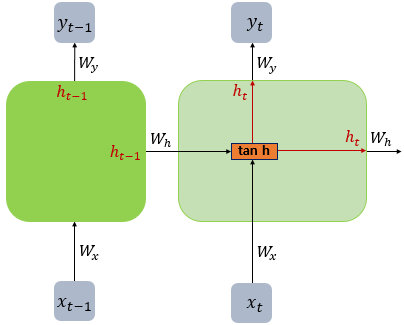

In [69]:
Image('Data/230628/9.png', width = 450)

### LSTM(Long Short-Term Memory)
- 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정함
- 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가
- LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보임
- 시점 t의 셀 상태: $C_t$
    - 셀 상태는 위의 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선. 셀 상태도 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됨

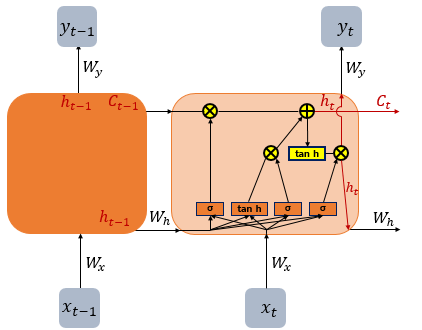

In [70]:
Image('Data/230628/10.png', width = 450)

#### 은닉 상태의 값과 셀 상태의 값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용
- 공통적으로 시그모이드 함수 사용 >> 0과 1사이의 값으로 게이트 조절

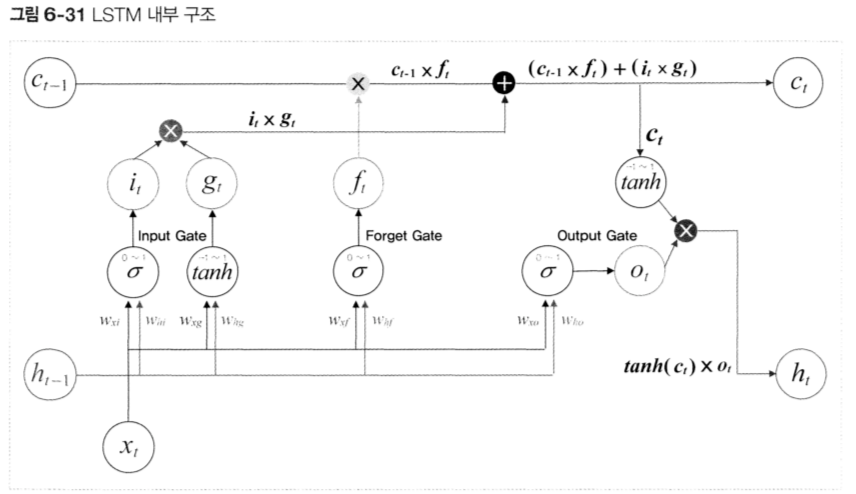

In [6]:
Image('Data/230628/0.png', width = 700)

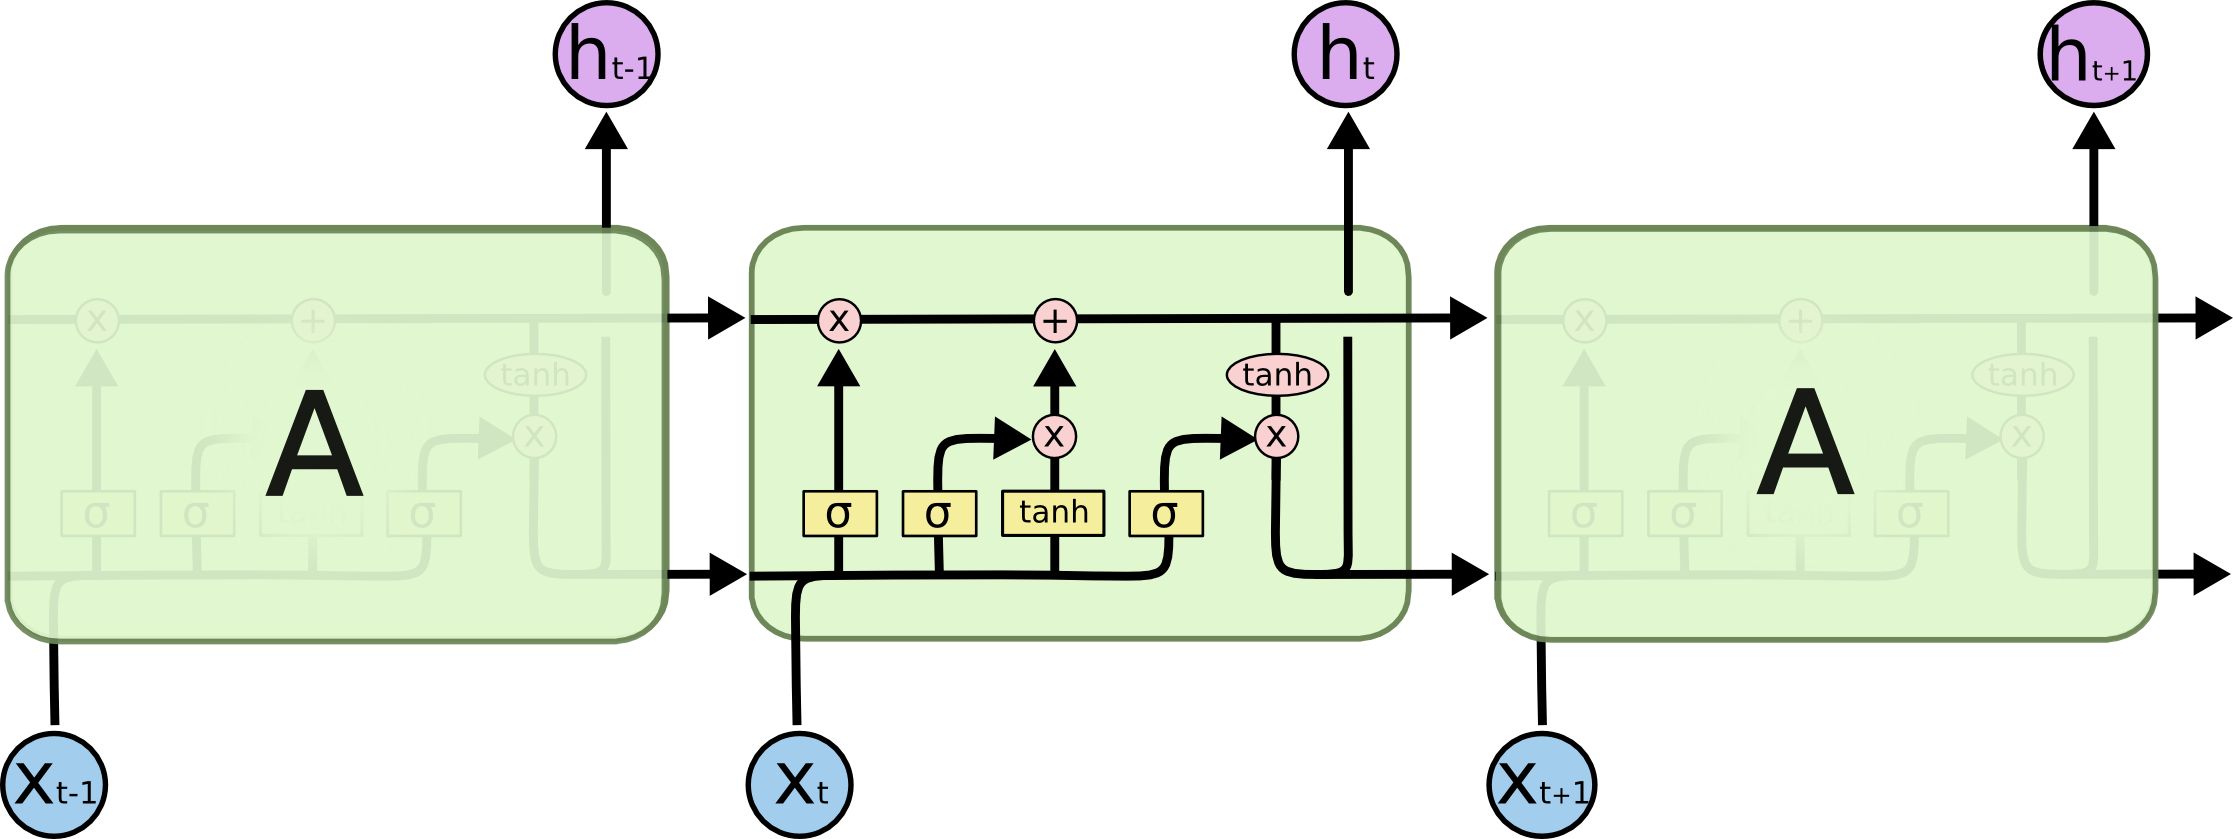

In [8]:
Image('Data/230628/14.png', width = 700)

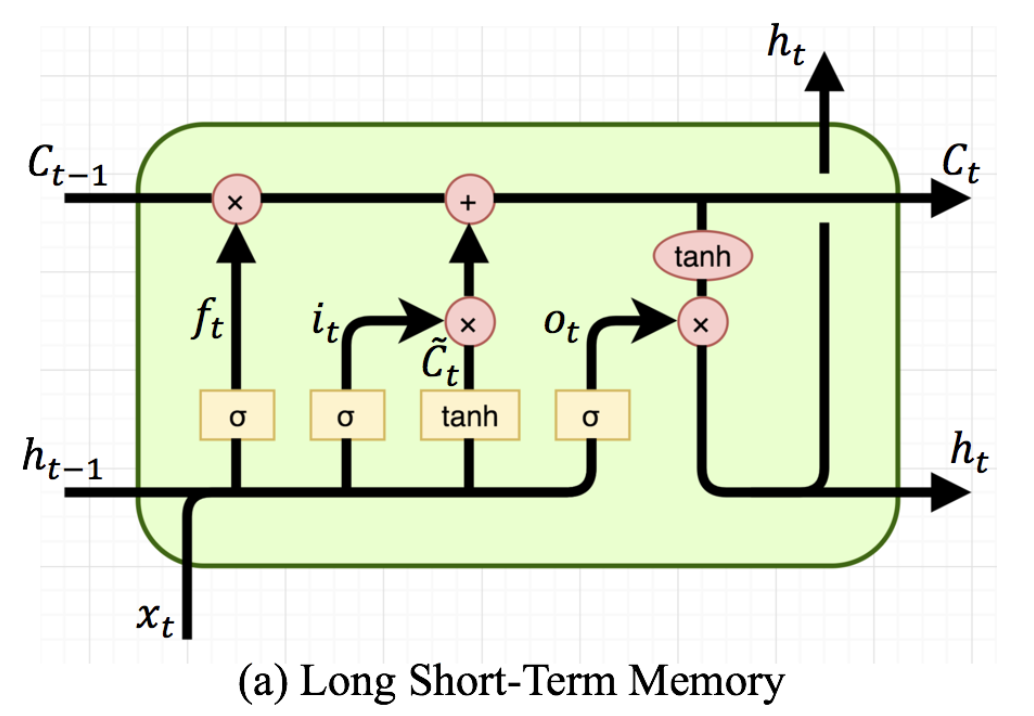

In [10]:
Image('Data/230628/15.png', width = 600)

#### 1) 입력 게이트 Input Gate $i_t$
- 현재 정보를 기억하기 위한 게이트
- 시그모이드 함수를 지나 0과 1사이의 값을 가지는 $i_t$ 과 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값을 가지는 $g_t$. 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 정하는데, 구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 참고

$$ i_t = sigmoid(W_{xi}x_t + W_{hi}h_{t-1} + b_i) $$
$$ g_t = tanh(W_{xg}x_t + W_{hg}h_{t-1} + b_g) $$

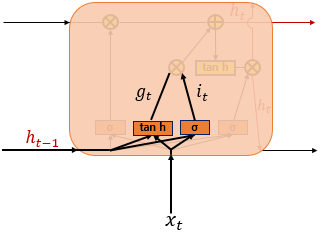

In [73]:
Image('Data/230628/11.png', width = 300)

#### 2) 삭제 게이트 Forget Gate $f_t$

- 기억을 삭제하기 위한 게이트
- 시그모이드 함수를 지나면 0과 1 사이의 값이 나옴: 이 값이 곧 삭제 과정을 거친 정보의 양
    - 0에 가까울수록 정보가 많이 삭제된 것이고 
    - 1에 가까울수록 정보를 온전히 기억한 것

$$ f_t = sigmoid(W_{xf}x_t + W_{hf}h_{t-1} + b_f) $$

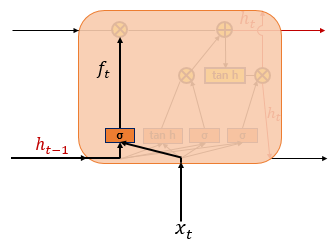

In [76]:
Image('Data/230628/12-0.png', width = 300)

#### 3) 셀 상태
- 삭제 게이트에서 일부 기억을 잃은 상태

$$ C_t = f_t\circ C_{t-1} + i_t \circ g_t $$  
$ \circ$ : 같은 위치의 성분끼리 곱하는 것

- 만약 삭제 게이트의 출력값인 $f_t$가 0이 된다면, 이전 시점의 셀 상태의 값인 $C_{t-1}$은 현재 시점의 셀 상태의 값을 결정하기 위한 영향력이 0이 되면서, 오직 입력 게이트의 결과만이 현재 시점의 셀 상태의 값 $C_t$을 결정할 수 있음. 이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미
- 반대로 입력 게이트의 값$i_t$을 0이라고 한다면, 현재 시점의 셀 상태의 값$C_t$는 오직 이전 시점의 셀 상태의 값 $C_{t-1}$의 값에만 의존함. 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미

- 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정함

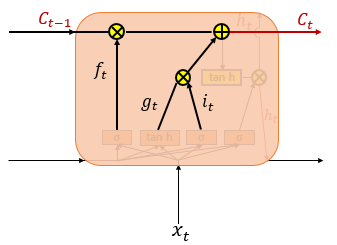

In [74]:
Image('Data/230628/12.png', width = 300)

####  4) 출력 게이트 $o_t$ 와 은닉 상태(최종 결과) $h_t$

$$ o_t = sigmoid(W_{xo}x_t + W_{ho}h_{t-1} + b_o) $$
$$ h_t = o_t \circ tanh(c_t) $$
- 출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값임. 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 됨.셀 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값이 되고, 해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과가 발생하여 은닉 상태가 됨. 은닉 상태의 값은 또한 출력층으로도 향하게 됨

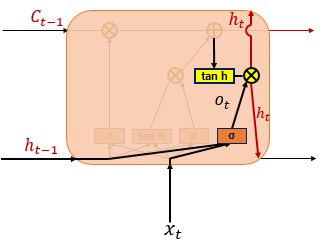

In [77]:
Image('Data/230628/13.png', width = 300)

#### 수식구현

https://docs.likejazz.com/lstm/

In [77]:
x = np.array([[
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [1.4, 1.5, 1.2],
    [1.9, 1.1, 1.2],
    [1.7, 1.4, 1.2],
    [1.5, 1.3, 1.2],
    [1.5, 1.3, 1.2],
    [0, 0.1, 0.2],
]])  # (None, 10, 3)
y = np.array([[1, 1, 1, 1, 0]])  # (None, 5)

In [78]:
def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)

ft = hard_sigmoid(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf)  # forget gate
it = hard_sigmoid(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi)  # input gate
ot = hard_sigmoid(np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo)  # output gate
Ct = ft * Ct_1 + it * np.tanh(np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc)
ht = ot * np.tanh(Ct)

ht_1 = ht  # hidden state, previous memory state
Ct_1 = Ct  # cell state, previous carry state

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM

model = Sequential()
model.add(LSTM(5, input_shape=(10, 3)))

model.compile(loss='MSE',
              optimizer='SGD',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5)                 180       
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(x, y, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.9186 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.9011 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8837 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8666 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.8500 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.8340 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8185 - accuracy: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8038 - accuracy: 1.0000
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7899 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7767 - accuracy:

In [81]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
#     print(name, weight.shape)
#     print(weight)
    layer_type = name.split('/')[2]
    if layer_type == 'kernel:0':
        kernel_0 = weight
    if layer_type == 'recurrent_kernel:0':
        recurrent_kernel_0 = weight
    elif layer_type == 'bias:0':
        bias_0 = weight

In [82]:
n = 1
units = 5  # LSTM layers

# (3, 20) embedding dims, units * 4
Wi = kernel_0[:, 0:units]
Wf = kernel_0[:, units:2 * units]
Wc = kernel_0[:, 2 * units:3 * units]
Wo = kernel_0[:, 3 * units:]

# (5, 20) units, units * 4
Ui = recurrent_kernel_0[:, 0:units]
Uf = recurrent_kernel_0[:, units:2 * units]
Uc = recurrent_kernel_0[:, 2 * units:3 * units]
Uo = recurrent_kernel_0[:, 3 * units:]

# (20,) units * 4
bi = bias_0[0:units]
bf = bias_0[units:2 * units]
bc = bias_0[2 * units:3 * units]
bo = bias_0[3 * units:]

ht_1 = np.zeros(n * units).reshape(n, units)
Ct_1 = np.zeros(n * units).reshape(n, units)

results = []
for t in range(0, len(x[0, :])):
    xt = np.array(x[0, t])

    ft = hard_sigmoid(np.dot(xt, Wf) + np.dot(ht_1, Uf) + bf)  # forget gate
    it = hard_sigmoid(np.dot(xt, Wi) + np.dot(ht_1, Ui) + bi)  # input gate
    ot = hard_sigmoid(np.dot(xt, Wo) + np.dot(ht_1, Uo) + bo)  # output gate
    Ct = ft * Ct_1 + it * np.tanh(np.dot(xt, Wc) + np.dot(ht_1, Uc) + bc)
    ht = ot * np.tanh(Ct)

    ht_1 = ht  # hidden state, previous memory state
    Ct_1 = Ct  # cell state, previous carry state

    results.append(ht)
    print(t, ht)

0 [[0.10790202 0.11649663 0.11445184 0.12411819 0.04711514]]
1 [[0.18811751 0.20245303 0.2199176  0.22417154 0.07948734]]
2 [[0.24644222 0.26600751 0.30388309 0.29730989 0.10097802]]
3 [[0.28856454 0.31292862 0.36444762 0.34806357 0.11451775]]
4 [[0.54812094 0.42524362 0.46496949 0.68524505 0.01590727]]
5 [[ 0.65948538  0.53838729  0.48846957  0.79508467 -0.01179528]]
6 [[ 0.72048868  0.58316738  0.52272532  0.86525313 -0.03873553]]
7 [[ 0.73738264  0.62196774  0.54294719  0.87358555 -0.05706589]]
8 [[ 0.74962086  0.63779286  0.55038541  0.8818046  -0.06839784]]
9 [[ 0.62875006  0.6834627   0.55319379  0.69824457 -0.0050806 ]]


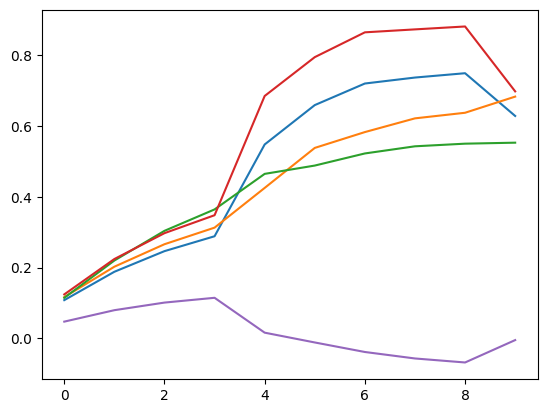

In [83]:
# plot hidden state changes

import matplotlib.pyplot as plt
plt.plot(np.array(results)[:, 0])
plt.show()

In [84]:
# The expected value is a little bit different from the actual value.
# but the implementation is the *SAME* with Keras.
import tensorflow as tf
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                 outputs=model.output)
output = intermediate_layer_model.predict(x[:1])
print()
print("Keras:", output)

1/1 [==============================] - 0s 267ms/step

Keras: [[ 0.66265213  0.72628605  0.5990639   0.73302823 -0.01533953]]


## 8-3. 게이트 순환 유닛 GRU Gated Recurrent Unit

- GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만이 존재
    - vs LSTM에서는 출력, 입력, 삭제 게이트라는 3개의 게이트가 존재

$$ r_t = sigmoid(W_{xr}x_t + W_{hr}h_{t-1} + b_r) $$
$$ z_t = sigmoid(W_{xz}x_t + W_{hz}h_{t-1} + b_z) $$
$$ g_t = tanh(W_{hg}(r_t \circ h_{t-1}) + W_{xg}x_t + b_g) $$
$$ h_t = (1 - z_t) \circ g_t + z_t \circ h_{t-1} $$

- GRU는 LSTM보다 학습 속도가 빠르다고 알려져있지만 여러 평가에서 GRU는 LSTM과 비슷한 성능을 보인다고 알려져 있음

- 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다고도 함


In [ ]:
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

## 8-4. 케라스의 SimpleRNN과 LSTM

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


↑ 단어 벡터의 차원은 5, 문장 길이가 4인 경우 가정

4번의 시점(timesteps)가 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용됨

RNN은 3D텐서를 입력으로 받으므로 2D텐서를 3D텐서로 변경: 배치 크기 1을 추가

In [58]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


↑(batch_size, timesteps, input_dim)에 해당되는 (1, 4, 5)의 크기를 가지는 3D 텐서가 생성됨

batch_size는 한 번에 RNN이 학습하는 데이터의 양을 의미하지만, 여기서는 샘플이 1개 밖에 없으므로 batch_size는 1임

### 1) SimpleRNN

In [59]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.998205   -0.98901826 -0.71870726]], shape: (1, 3)


↑ (1, 3) 크기의 텐서가 출력되는데, 이는 마지막 시점의 은닉 상태임

은닉 상태의 크기를 3으로 지정

기본적으로 return_sequences가 False인 경우에는 SimpleRNN은 마지막 시점의 은닉 상태만 출력

#### return_sequences = True
- 모든 시점(timestep)의 은닉상태(hidden state)를 return
- default는 False

In [60]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.6755634  -0.9990708   0.9352011 ]
  [-0.9399735  -0.9997974  -0.95302963]
  [ 0.8826213  -0.9941744  -0.85730994]
  [ 0.7942979  -0.9994199  -0.12214511]]], shape: (1, 4, 3)


↑ return_sequences를 True로 지정하여 모든 시점의 은닉 상태를 출력: (1, 4, 3) 크기의 텐서가 출력

입력 데이터 x_train은 (1, 4, 5)의 크기를 가지는 3D 텐서였고, 그 중 4가 시점(timesteps)에 해당하는 값이므로,

모든 시점에 대해서 은닉 상태의 값을 출력하여 (1, 4, 3) 크기의 텐서를 출력하게 됨

#### return_state = True
- 마지막 시점(timestep)의 은닉상태(hidden state)를 return
- default는 False

return_sequences와 return_state를 따로 설정하지 않으면 RNN모델의 return값은 마지막 timestep의 hidden state가 됨

In [61]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.9980553   0.98989844 -0.9995357 ]
  [ 0.9824901   0.9993681  -0.97413296]
  [ 0.57275915  0.9268947  -0.954671  ]
  [-0.46073604  0.9984293  -0.8300886 ]]], shape: (1, 4, 3)
last hidden state : [[-0.46073604  0.9984293  -0.8300886 ]], shape: (1, 3)


↑ 모든 시점의 은닉 상태인 (1, 4, 3) 텐서의 마지막 벡터값이 return_state=True로 인해 출력된 벡터값과 일치함

In [62]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.8556314  0.9811922  0.9906275]], shape: (1, 3)
last hidden state : [[-0.8556314  0.9811922  0.9906275]], shape: (1, 3)


↑ return_sequences는 False인데, retun_state가 True인 경우: 마지막 시점의 은닉 상태 출력

### 2) LSTM

#### return_state = True
- LSTM인 경우 return값이 2개임: 마지막 hidden state, 마지막 cell state

In [63]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.0694987   0.16695887  0.15268879]], shape: (1, 3)
last hidden state : [[-0.0694987   0.16695887  0.15268879]], shape: (1, 3)
last cell state : [[-0.11020023  0.3619825   0.5312532 ]], shape: (1, 3)


↑ return_sequences가 False이므로 우선 첫번째 결과는 마지막 시점의 은닉 상태

그런데 LSTM이 SimpleRNN과 다른 점은 return_state를 True로 둔 경우에는 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환한다는 점

#### return_sequences = True, return_state = True

In [64]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[0.01834116 0.00379585 0.01854081]
  [0.04095094 0.00217733 0.08524366]
  [0.07884534 0.1310446  0.21458475]
  [0.14468144 0.07288253 0.28565812]]], shape: (1, 4, 3)
last hidden state : [[0.14468144 0.07288253 0.28565812]], shape: (1, 3)
last cell state : [[0.16970946 0.49400592 0.40494844]], shape: (1, 3)


↑ return_sequences를 True이므로 첫번째 출력값에서 모든 시점의 은닉상태 출력,

return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태로 동일

### 3) Bidirectional LSTM (양방향 LSTM)

In [65]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

#### return_state = True 인 경우
- 마지막 hidden state를 출력
- forward의 마지막 timestep의 hidden state와 backward의 첫번째 timestep의 hidden state

In [66]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


↑ 5개의 값을 반환함

- return_state = True: 정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태 4가지를 반환하기 때문
<br> 다만, 셀 상태는 각각 forward_c와 backward_c에 저장만 하고 출력하지 않았음
<br> 첫번째 출력값의 크기는 (1, 6)임: (return_sequences = False인 경우 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환되기 때문)

- return_state가 True인 경우에 반환한 은닉 상태의 값인 forward_h와 backward_h는 각각 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태값임. 이 두 값을 연결한 값이 hidden_states에 출력되는 값임

- 그림으로 표현하면 아래와 같이 연결되어 다음층에 사용됨

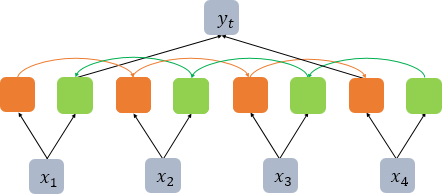

In [103]:
Image('Data/230628/24.png', width = 500)

#### return_sequences = True인 경우
- 각 timestep의 hidden states, forward와 backward의 hidden state를 출력
- forward와 backward의 hidden state가 짝을 이뤄 다음 층의 입력으로 사용됨

In [68]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


↑ return_sequences를 True로 할 경우: hidden states의 출력값에서는 이제 모든 시점의 은닉 상태가 출력됨

- 역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됨

- 그림으로 표현하면 아래와 같이 연결되어 다음층의 입력으로 사용됨

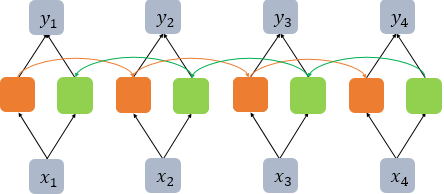

In [105]:
Image('Data/230628/25.png', width = 500)